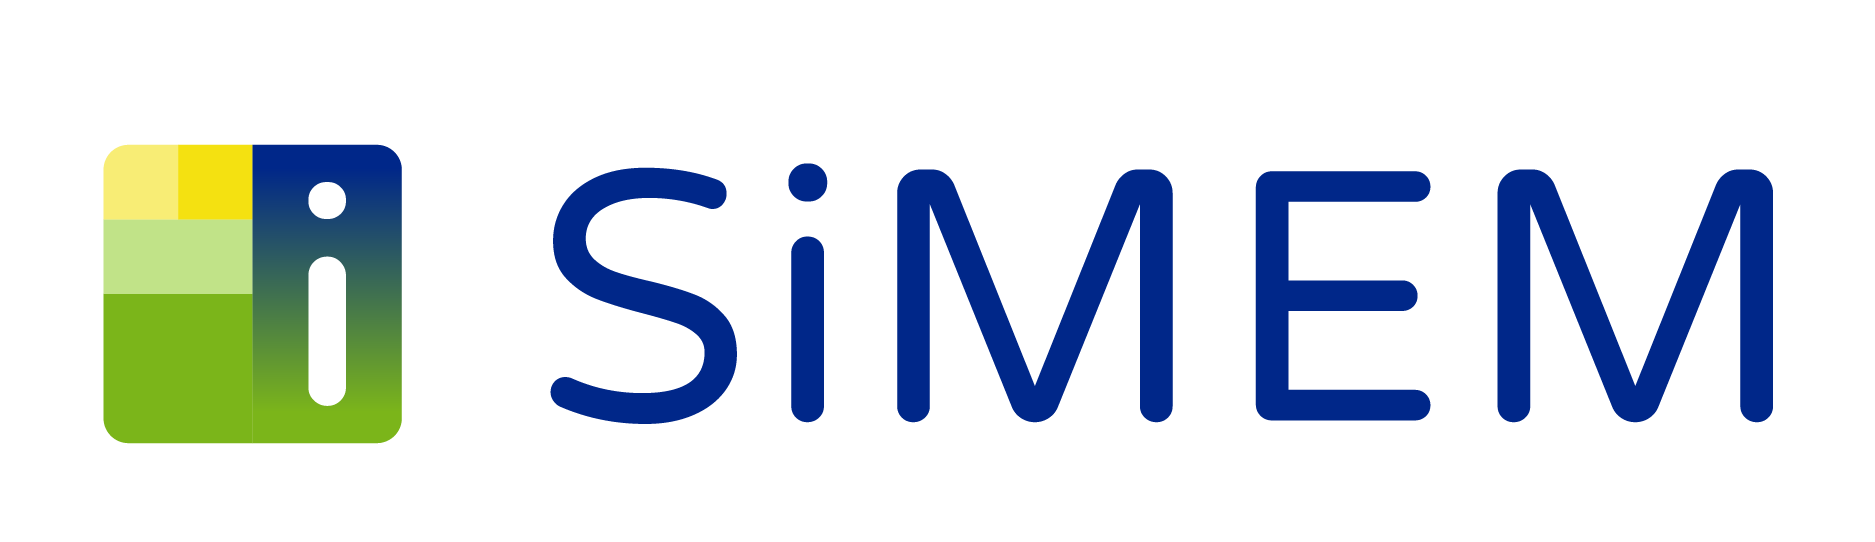

[SiMEM](https://www.simem.co/)

## Caso de uso - Costo Equivalente Real de Energía y Costo Equivalente de Energía

# Objetivos de este Notebook

* Explicar cómo se realiza la instalación e importación de la librería pydataxm desde la consola para su uso en ambientes locales
* Explicar cómo se pueden consultar los conjuntos de datos a través de la librería Pydataxm
* Explicar cómo realizar el procesamiento y manipulación de los datos consultados
* Explicar el análisis de los datos consultados para dar respuesta al caso de uso propuesto
 
**Índice**

1. [Instalación de librerías](#section1)

2. [Importación de librerías](#section2)

3. [Consultar información de los conjuntos de datos](#section3)

4. [Manipulación de datos](#section4)

5. [Análisis para dar respuesta al caso de uso](#section5)

<a id='section1'></a>
# 1. Instalación de la librería
Ejecutar el siguiente comando en el CMD para instalar la librería de python.

In [1]:
# import sys
# !{sys.executable} -m pip install pydataxm

<a id='section2'></a>
# 2. Importación de librerías

In [ ]:
# Importación de librerías necesarias para la consulta y análisis de datos
from pydataxm.pydatasimem import ReadSIMEM  # Importa clases para interactuar con datos del sistema SIMEM, utilizado para acceder a información energética en Colombia
import pandas as pd                         # Librería para manipulación y análisis de datos en estructuras tipo DataFrame, muy útil para limpiar, transformar y explorar datos
import plotly.graph_objects as go           # Módulo de Plotly para crear visualizaciones interactivas y personalizadas, como gráficos de líneas, barras, áreas, etc.

<a id='section3'></a>
# 3. Consultar información de los conjuntos de datos
El método de extracción recibe los parámetros con los que se va a realizar la consulta. 
El datasetID para un conjunto particular se puede encontrar en el [catálogo de conjuntos de datos.](https://www.simem.co/pages/catalogodatos/51FC0A59-3A00-462C-B449-9CB8D5E007FB)  
Para este ejemplo el conjunto a presentar es  [Costo Equivalente Real de Energía y Costo Equivalente de Energía (CERE y CEE)](https://www.simem.co/datadetail/ED7CAABF-FD4E-45F2-91CA-AC5B8CB4AFF0) para el período 2022-2024.

Se definen los parámetros de entrada y se crea el objeto ReadSIMEM() para realizar las consultas.

La función main contiene todo el proceso para transportar la información del dataset entre el rango de fechas solicitadas a un dataframe. Después de este paso, el proceso es de manipulación y visualización de datos.

In [3]:
id_dataset = 'ED7CAA'                                       # ID del conjunto de datos a consultar
fecha_inicial = '2022-01-01'                                # Fecha de inicio del rango de consulta
fecha_final = '2024-12-31'                                  # Fecha de fin del rango de consulta
simem = ReadSIMEM(id_dataset, fecha_inicial, fecha_final)   # Instancia de la clase ReadSIMEM con los parámetros definidos
df_dataset = simem.main()                                   # Ejecución del método principal para obtener los datos en un DataFrame
display(df_dataset.head(20))                                # Visualización de las primeras 20 filas del DataFrame

****************************************************************************************************
Initializing object
The object has been initialized with the dataset: "Costo Equivalente Real de Energía y Costo Equivalente de Energía (CERE y CEE)"
****************************************************************************************************
Inicio consulta sincronica
Creacion url: 0.0015327930450439453
Extraccion de registros: 3.4757988452911377
End of data extracting process
****************************************************************************************************


,Fecha,CodigoDuracion,CEE,CERE
0,2023-12-01,P1M,74.55,75.62
1,2023-11-01,P1M,82.56,81.51
2,2023-10-01,P1M,80.91,76.62
3,2023-09-01,P1M,82.68,79.80
4,2023-08-01,P1M,79.99,82.44
5,2023-07-01,P1M,84.41,82.12
6,2023-06-01,P1M,92.27,88.08
7,2023-05-01,P1M,93.09,90.90
8,2023-04-01,P1M,98.08,101.94
9,2023-03-01,P1M,99.65,98.43


Además se leerán los conjuntos de datos con el precio de bolsa horario y oef diaria con los mismos rangos de fechas

In [4]:
id_dataset = 'EC6945'                                                                           # ID del conjunto de datos a consultar
fecha_inicial = '2022-01-01'                                                                    # Fecha de inicio del rango de consulta
fecha_final = '2024-12-31'                                                                      # Fecha de fin del rango de consulta
nombre_columna = 'CodigoVariable'                                                               # Nombre de la columna que se desea filtrar
valor_filtro = 'PB_Nal'                                                                         # Valor del filtro para la columna
simem_pbNal = ReadSIMEM(id_dataset, fecha_inicial, fecha_final, nombre_columna, valor_filtro)   # Instancia de la clase ReadSIMEM con los parámetros definidos
df_pbNal = simem_pbNal.main(filter=True)                                                        # Ejecución del método principal para obtener los datos en un DataFrame
display(df_pbNal.head(10))                                                                      # Visualización de las primeras 10 filas del DataFrame

****************************************************************************************************
Initializing object
The object has been initialized with the dataset: "Precio de bolsa horario"
****************************************************************************************************
Inicio consulta sincronica
Creacion url: 0.0009636878967285156
Extraccion de registros: 115.7806556224823
End of data extracting process
****************************************************************************************************


,CodigoVariable,FechaHora,CodigoDuracion,UnidadMedida,Version,Valor
0,PB_Nal,2022-01-31 00:00:00,PT1H,COP/kWh,TX4,454.2241
1,PB_Nal,2022-01-31 01:00:00,PT1H,COP/kWh,TX4,454.2241
2,PB_Nal,2022-01-31 02:00:00,PT1H,COP/kWh,TX4,454.2241
3,PB_Nal,2022-01-31 03:00:00,PT1H,COP/kWh,TX4,454.2241
4,PB_Nal,2022-01-31 04:00:00,PT1H,COP/kWh,TX4,454.2241
5,PB_Nal,2022-01-31 05:00:00,PT1H,COP/kWh,TX4,527.2241
6,PB_Nal,2022-01-31 06:00:00,PT1H,COP/kWh,TX4,527.2241
7,PB_Nal,2022-01-31 07:00:00,PT1H,COP/kWh,TX4,527.2241
8,PB_Nal,2022-01-31 08:00:00,PT1H,COP/kWh,TX4,537.2241
9,PB_Nal,2022-01-31 09:00:00,PT1H,COP/kWh,TX4,537.2241


Se leerá el conjunto de datos con la OEF diaria con los mismos rangos de fechas, y se filtrará este por su máxima versión

In [5]:
id_dataset = '4eb7e3'                                                                           # ID del conjunto de datos a consultar
fecha_inicial = '2022-01-01'                                                                    # Fecha de inicio del rango de consulta
fecha_final = '2024-12-31'                                                                      # Fecha de fin del rango de consulta
nombre_columna = 'CodigoVariable'                                                               # Nombre de la columna que se desea filtrar
valor_filtro = 'OEFDiaria'                                                                      # Valor del filtro para la columna
simem_oef = ReadSIMEM(id_dataset, fecha_inicial, fecha_final, nombre_columna, valor_filtro)     # Instancia de la clase ReadSIMEM con los parámetros definidos
df_oef = simem_oef.main(filter=True)                                                            # Ejecución del método principal para obtener los datos en un DataFrame
display(df_oef.head(10))                                                                        # Visualización de las primeras 10 filas del DataFrame

****************************************************************************************************
Initializing object
The object has been initialized with the dataset: "Datos soporte del proceso de liquidación por Código sic agente, Recurso, versión y diaria"
****************************************************************************************************
Inicio consulta sincronica
Creacion url: 0.0020716190338134766
Extraccion de registros: 159.10524702072144
End of data extracting process
****************************************************************************************************


,CodigoVariable,FechaInicio,CodigoDuracion,UnidadMedida,CodigoSICAgente,CodigoPlanta,Version,Valor
0,OEFDiaria,2022-01-31,P1D,kWh,ENDG,ZPA4,TX4,1.102310e+06
1,OEFDiaria,2022-01-31,P1D,kWh,EPMG,CSC1,TX4,3.380636e+04
2,OEFDiaria,2022-01-31,P1D,kWh,HDTG,STG1,TX4,1.832333e+04
3,OEFDiaria,2022-01-31,P1D,kWh,TMMG,2U91,TX4,4.630281e+05
4,OEFDiaria,2022-01-31,P1D,kWh,EPSG,2VJS,TX4,5.020778e+04
5,OEFDiaria,2022-01-31,P1D,kWh,HLAG,IQU1,TX4,5.512572e+04
6,OEFDiaria,2022-01-31,P1D,kWh,PRIG,PRG1,TX4,1.837715e+06
7,OEFDiaria,2022-01-31,P1D,kWh,HZEG,PMR1,TX4,6.916820e+03
8,OEFDiaria,2022-01-31,P1D,kWh,ENDG,CQT1,TX4,8.954760e+03
9,OEFDiaria,2022-01-31,P1D,kWh,RENG,2SI1,TX4,1.596950e+05


<a id='section4'></a>
# 4. Manipulación de datos
Los siguientes pasos corresponden a las actividades de manipulación y preparación de los datos que son relevantes para el análisis. 

Inicialmente se crearán funciones que serán de utilidad para el proceso de Manipulación de datos

In [6]:
def filtrar_ultima_version(df, columna_fecha, columna_version, columna_variable=None):                      # Función para filtrar la última versión de registros por mes y variables (opcional)
    versiones = ['TX1', 'TX2', 'TXR', 'TXF', 'TX3', 'TX4', 'TX5', 'TX6', 'TX7', 'TX8', 'TX9', 'TX10']        # Lista de versiones ordenadas por prioridad
    version_orden = pd.Series(range(1, len(versiones) + 1), index=versiones)                                # Serie que asigna un orden numérico a cada versión
    df[columna_fecha] = pd.to_datetime(df[columna_fecha])                                                   # Conversión de la columna de fecha a tipo datetime
    df['año_mes'] = df[columna_fecha].dt.to_period('M')                                                     # Se crea una columna con el año y mes del registro
    df['orden_version'] = df[columna_version].map(version_orden)                                            # Se asigna el orden de versión a cada fila

    if columna_variable is None:                                                                            # Si no se especifican variables adicionales
        df_filtrado = df.sort_values(['año_mes', 'orden_version'], ascending=[True, False])                 # Ordena por mes y versión descendente
        df_filtrado = df_filtrado.drop_duplicates(subset=[columna_fecha], keep='first')                     # Elimina duplicados conservando la última versión por fecha
    else:                                                                                                    # Si se especifican variables adicionales
        if isinstance(columna_variable, str):                                                               # Convierte a lista si es un solo string
            columna_variable = [columna_variable]
        orden_columnas = columna_variable + ['año_mes', 'orden_version']                                    # Define el orden de columnas para ordenar
        df_filtrado = df.sort_values(orden_columnas, ascending=[True]*len(columna_variable) + [True, False])# Ordena por variables, mes y versión
        df_filtrado = df_filtrado.drop_duplicates(subset=columna_variable + [columna_fecha], keep='first')  # Elimina duplicados por variables y fecha

    df_filtrado = df_filtrado.drop(columns=['año_mes', 'orden_version'])                                    # Elimina columnas auxiliares
    return df_filtrado                                                                                      # Retorna el DataFrame filtrado

In [7]:
def agrupar_mensualmente_dataset(df, columna_fecha, columna_variable, columna_valor, variable, operacion):
    df = df.sort_values(by=columna_fecha)                                                       # Ordena los datos por la columna fecha
    df_pivot = df.pivot(index=columna_fecha, columns=columna_variable, values=columna_valor)    # Pivotear el DataFrame usando 'Fecha' como índice
    df_pivot.reset_index(inplace=True)                                                          # Resetea el indice como columna Fecha
    df_pivot = df_pivot.assign(Fecha=pd.to_datetime(df_pivot[columna_fecha]))                   # Se cambia el tipo de dato de la columna Fecha
    df_pivot['año_mes'] = df_pivot['Fecha'].dt.strftime('%Y-%m')                                # Se agrega una columna con el año y el mes
    if operacion == 'sum':
        df_mensual = df_pivot.groupby('año_mes', as_index=False)[variable].sum()                   # Se agrupa la información del precio de bolsa por mes
    else:
        df_mensual = df_pivot.groupby('año_mes', as_index=False)[variable].mean()                   # Se agrupa la información del precio de bolsa por mes
    df_mensual.rename(columns={variable: f'{variable}_mensual'}, inplace=True)                  # Se renombra la columna de la variable
    return df_mensual                                                                           # Se retorna el dataset agrupado mensualmente

Los dataframes se filtarán para tener los datos necesarios para la visualización, eligiendo el CERE y el CEE.

In [8]:
df_filtrado = df_dataset[['Fecha', 'CERE','CEE']]                   # Selecciona únicamente las columnas 'Fecha','CERE' y 'CEE' del DataFrame
df_filtrado = df_filtrado.sort_values(by='Fecha', ascending=False)  # Ordena los datos por la columna Fecha

display(df_filtrado.head(5))                                        # Muestra el DataFrame filtrado

,Fecha,CERE,CEE
24,2024-12-01,93.15,87.75
25,2024-11-01,83.95,84.31
26,2024-10-01,79.46,81.90
27,2024-09-01,79.66,77.65
28,2024-08-01,83.99,76.03


In [9]:
df_filtrado['Fecha'] = pd.to_datetime(df_filtrado['Fecha'])                     # Se asegura que la columna Fecha sea de tipo Datetime
df_filtrado['año_mes'] = df_filtrado['Fecha'].dt.strftime('%Y-%m')              # Se agrega una columna con el año y el mes

display(df_filtrado.head(5))                                                    # Muestra el DataFrame con la nueva columna año-mes

,Fecha,CERE,CEE,año_mes
24,2024-12-01,93.15,87.75,2024-12
25,2024-11-01,83.95,84.31,2024-11
26,2024-10-01,79.46,81.90,2024-10
27,2024-09-01,79.66,77.65,2024-09
28,2024-08-01,83.99,76.03,2024-08


Ahora se manipularan los datos del precio de bolsa

In [10]:
df_result = filtrar_ultima_version(df=df_pbNal, columna_fecha='FechaHora', columna_version='Version')       # Aplica la función al DataFrame original
df_result = df_result.sort_values(by='FechaHora')                                                           # Ordena los datos por la fecha
df_result = df_result[['FechaHora', 'CodigoVariable', 'Version', 'Valor']]                                  # Selecciona únicamente las columnas 'FechaHora','CodigoVariable', 'Version' y 'Valor' del DataFrame
df_result                                                                                                   # Muestra el resultado filtrado

,FechaHora,CodigoVariable,Version,Valor
743,2022-01-01 00:00:00,PB_Nal,TX4,186.5768
742,2022-01-01 01:00:00,PB_Nal,TX4,186.5768
741,2022-01-01 02:00:00,PB_Nal,TX4,186.5768
740,2022-01-01 03:00:00,PB_Nal,TX4,198.2558
739,2022-01-01 04:00:00,PB_Nal,TX4,186.5768
...,...,...,...,...
95974,2024-12-31 19:00:00,PB_Nal,TX6,500.0515
95973,2024-12-31 20:00:00,PB_Nal,TX6,249.6995
95972,2024-12-31 21:00:00,PB_Nal,TX6,155.0515
95971,2024-12-31 22:00:00,PB_Nal,TX6,119.0515


In [11]:
df_pbNal_mensual = agrupar_mensualmente_dataset(df_result, 'FechaHora', 'CodigoVariable', 'Valor', 'PB_Nal', 'mean')   # Se aplica la función para agrupar al DataFrame filtrado
display(df_pbNal_mensual.head(5))                                                                              # Muestra los primeros 5 registros del DataFrame mensual

,año_mes,PB_Nal_mensual
0,2022-01,289.918869
1,2022-02,399.164648
2,2022-03,227.000183
3,2022-04,143.794782
4,2022-05,105.489741


Ahora se manipularan los datos de la oef

In [12]:
df_oef_result = filtrar_ultima_version(df=df_oef, columna_fecha='FechaInicio', columna_version='Version',
                                       columna_variable='CodigoPlanta')     # Aplica la función al DataFrame original
df_oef_result = df_oef_result.sort_values(by='FechaInicio')                                                   # Ordena los datos por la fecha
df_oef_result = df_oef_result[['FechaInicio', 'CodigoVariable', 'CodigoPlanta', 'Version', 'Valor']]          # Selecciona únicamente las columnas necesarias del DataFrame
df_oef_result = df_oef_result.groupby(['FechaInicio','CodigoVariable'])['Valor'].sum().reset_index()
df_oef_result                                                                                                 # Muestra el resultado filtrado

,FechaInicio,CodigoVariable,Valor
0,2022-01-01,OEFDiaria,1.821920e+08
1,2022-01-02,OEFDiaria,1.920181e+08
2,2022-01-03,OEFDiaria,2.141277e+08
3,2022-01-04,OEFDiaria,2.198539e+08
4,2022-01-05,OEFDiaria,2.227134e+08
...,...,...,...
1032,2024-12-27,OEFDiaria,2.487503e+08
1033,2024-12-28,OEFDiaria,2.368879e+08
1034,2024-12-29,OEFDiaria,2.237699e+08
1035,2024-12-30,OEFDiaria,2.344286e+08


In [13]:
df_oef_mensual = agrupar_mensualmente_dataset(df_oef_result, 'FechaInicio', 'CodigoVariable', 'Valor', 'OEFDiaria', 'sum')   # Se aplica la función para agrupar al DataFrame filtrado
df_oef_mensual['OEFDiaria_mensual'] = df_oef_mensual['OEFDiaria_mensual']/1000000
display(df_oef_mensual.head(5))      

,año_mes,OEFDiaria_mensual
0,2022-01,6826.729146
1,2022-02,6464.616859
2,2022-03,7013.972967
3,2022-04,6784.948486
4,2022-05,7055.033433


Se une la información del CERE y CEE con el precio de bolsa y OEF

In [14]:
df_mensual = pd.merge(df_filtrado, df_pbNal_mensual, on='año_mes', how='inner')
df_mensual = pd.merge(df_mensual, df_oef_mensual, on='año_mes', how='inner')

df_mensual

,Fecha,CERE,CEE,año_mes,PB_Nal_mensual,OEFDiaria_mensual
0,2024-12-01,93.15,87.75,2024-12,741.004162,7670.342453
1,2024-11-01,83.95,84.31,2024-11,1046.433427,7173.605449
2,2024-10-01,79.46,81.90,2024-10,1529.135670,7256.194704
3,2024-09-01,79.66,77.65,2024-09,873.706956,7277.467659
4,2024-08-01,83.99,76.03,2024-08,567.417753,7544.319691
5,2024-07-01,83.17,77.09,2024-07,285.092820,7580.753668
6,2024-06-01,86.72,72.86,2024-06,280.697367,7304.603975
7,2024-05-01,76.81,74.49,2024-05,291.549851,7407.995790
8,2024-04-01,74.88,72.50,2024-04,748.656770,7127.236580
9,2024-03-01,72.93,74.50,2024-03,622.773567,7203.843687


<a id='section5'></a>
# 5. Análisis para dar respuesta al caso de uso

Ahora se calculan datos estadísticos básicos para el CERE y el CEE
- Media: Promedio de los valores. Indica el nivel típico de CEE o CERE.
- Desviación estándar: Mide cuánto varían los valores respecto a la media. Más alta = más variabilidad.
- Correlación: Mide qué tan relacionados están CEE y CERE. Valor cercano a 1 = se mueven juntos.

In [15]:
# Calcular estadísticas básicas
media_cee = df_filtrado['CEE'].mean()
media_cere = df_filtrado['CERE'].mean()
std_cee = df_filtrado['CEE'].std()
std_cere = df_filtrado['CERE'].std()
correlacion = df_filtrado['CEE'].corr(df_filtrado['CERE'])

# Mostrar resultados
print("Estadísticas Básicas")
print("--------------------")
print(f"Media CEE: ${media_cee:.2f} COP/kWh")
print(f"Media CERE: ${media_cere:.2f} COP/kWh")
print(f"Desviación estándar CEE: ${std_cee:.2f} COP/kWh")
print(f"Desviación estándar CERE: ${std_cere:.2f} COP/kWh")
print(f"Correlación entre CEE y CERE: {correlacion:.2f}")

Estadísticas Básicas
--------------------
Media CEE: $82.60 COP/kWh
Media CERE: $85.24 COP/kWh
Desviación estándar CEE: $7.89 COP/kWh
Desviación estándar CERE: $9.00 COP/kWh
Correlación entre CEE y CERE: 0.85


Ahora se grafica el valor del CERE vs el valor del CEE durante el período 2022-2024

In [16]:
# Crear la figura de Plotly
fig = go.Figure()

# Agregar la serie de tiempo para CEE
fig.add_trace(go.Scatter(
    x=df_mensual["Fecha"],
    y=df_mensual["CEE"],
    mode='lines',
    name="CEE"
))

# Agregar la serie de tiempo para CERE
fig.add_trace(go.Scatter(
    x=df_mensual["Fecha"],
    y=df_mensual["CERE"],
    mode='lines',
    name="CERE"
))

# Configurar el diseño del gráfico
fig.update_layout(
    title="Evolución del CEE y CERE ",
    xaxis_title='Fecha',
    yaxis_title='COP/kWh',
    xaxis=dict(tickformat='%d-%m-%y'),
    template='plotly_white'
)

# Mostrar la gráfica
fig.show()

In [17]:
# Agregar la serie de tiempo para PB_Nal
fig.add_trace(go.Scatter(
    x=df_mensual["Fecha"],
    y=df_mensual["PB_Nal_mensual"],
    mode='lines',
    name="PB_Nal"
))

# Configurar el diseño del gráfico
fig.update_layout(
    title="Evolución del CEE y CERE VS PB_Nal"
)

# Mostrar la gráfica
fig.show()

In [18]:
fig = go.Figure()

# Agregar la serie de tiempo para CERE
fig.add_trace(go.Scatter(
    x=df_mensual["Fecha"],
    y=df_mensual["CERE"],
    mode='lines',
    name="CERE (COP/Kwh)"
))

# Trazado para X vs Y (eje izquierdo)
fig.add_trace(go.Scatter(
    x=df_mensual['Fecha'],
    y=df_mensual['PB_Nal_mensual'],
    mode='lines+markers',
    name='PB_Nal (COP/Kwh)',
    yaxis='y1',
    line=dict(
        color='orange'
    )
))

# Trazado para X vs Z (eje derecho)
fig.add_trace(go.Scatter(
    x=df_mensual['Fecha'],
    y=df_mensual['OEFDiaria_mensual'],
    mode='lines+markers',
    name='OEF (GWh)',
    yaxis='y2',
    line=dict(
        color='purple'
    )
))

# Configurar diseño con doble eje Y
fig.update_layout(
    title='CERE VS PB_Nal VS OEF',
    xaxis=dict(title='Fecha'),
    yaxis=dict(
        title=dict(text='COP/KWh', font=dict(color='orange')),
        tickfont=dict(color='orange')
    ),
    yaxis2=dict(
        title=dict(text='GWh', font=dict(color='purple')),
        tickfont=dict(color='purple'),
        overlaying='y',
        side='right'
    ),
    template='plotly_white'
)

fig.show()